## 1번 문제
DecisionTreeClassifier을 사용하여 Wine 데이터를 분류 하시오.

  * Validation_curve 함수를 사용하여 아래 Hyperparameters의 변화에 따른 결과를 그래프로 표현하시오.
    * max_depth
    * min_samples_leaf
    * criterion
  * 가장 높은 accuracy를 기록하는 파리미터 조합을 도출하시오.

  ```python
  from sklearn.datasets import load_wine

  wine = load_wine()
  ```


## 1번 문제 답안

### Setup

In [1]:
# common lib
import sklearn
import numpy as np

### Datasets

#### wine dataset

In [2]:
from sklearn import datasets
import pandas as pd

wine = datasets.load_wine()
wine_X = wine["data"]

wine_y = wine["target"]

pd.DataFrame(wine_X).head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0


### Preprocess

#### Splitting

In [3]:
from sklearn.model_selection import train_test_split
wine_X_train, wine_X_test, wine_y_train, wine_y_test = train_test_split(wine_X, wine_y, random_state=42)

### DecisionTree Classifier



**- sklearn.tree.[DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) : Returns the instance itself.**

A decision tree classifier.

In [4]:
from sklearn.tree import DecisionTreeClassifier

dt_model_wine = DecisionTreeClassifier(random_state=42)
dt_model_wine.fit(wine_X_train, wine_y_train)

DecisionTreeClassifier(random_state=42)

#### Evaluation

In [5]:
from sklearn import metrics

predict = dt_model_wine.predict(wine_X_train)
acc = metrics.accuracy_score(wine_y_train, predict)
print('Train Accuracy(wine): {}'.format(acc))


predict = dt_model_wine.predict(wine_X_test)
acc = metrics.accuracy_score(wine_y_test, predict)
print('Test Accuracy(wine): {}'.format(acc))

Train Accuracy(wine): 1.0
Test Accuracy(wine): 0.9555555555555556


## Improving performance

### Preprocess

#### Splitting

In [6]:
from sklearn.model_selection import train_test_split
wine_X_train, wine_X_test, wine_y_train, wine_y_test = train_test_split(wine_X, wine_y, random_state=42)

### Set Hyperparameters(max_depth, min_samples_leaf,criterion)

#### Visualization 함수

In [7]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

def viz_val_curve(param_range, train_mean, train_std, test_mean, test_std, param_name, xscale_log=False):
  plt.plot(param_range, train_mean, 
          color='blue', marker='o', 
          markersize=5, label='Training accuracy')

  plt.fill_between(param_range, train_mean + train_std,
                  train_mean - train_std, alpha=0.15,
                  color='blue')

  plt.plot(param_range, test_mean, 
          color='green', linestyle='--', 
          marker='s', markersize=5, 
          label='Validation accuracy')

  plt.fill_between(param_range, 
                  test_mean + test_std,
                  test_mean - test_std, 
                  alpha=0.15, color='green')


  plt.grid()
  plt.legend(loc='lower right')
  if xscale_log:
    plt.xscale('log')
  plt.xlabel(param_name)
  plt.ylabel('Accuracy')
  plt.ylim([np.min(test_mean)*0.8, np.max(train_mean)*1.2])
  plt.tight_layout()
  plt.show()

In [8]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

def viz_val_bar(param_range, train_mean, train_std, test_mean, test_std, param_name):
  idx = np.arange(len(param_range))
  plt.bar(idx, test_mean, width=0.3)
  plt.xlabel(param_name)
  plt.ylabel('Accuracy')
  plt.ylim([np.min(test_mean)*0.99, np.max(test_mean)*1.01])
  plt.xticks(idx, param_range, fontsize=15)
  plt.show()

#### Validation_curve(max_depth)

#### **max_depth**
* default = None
* The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

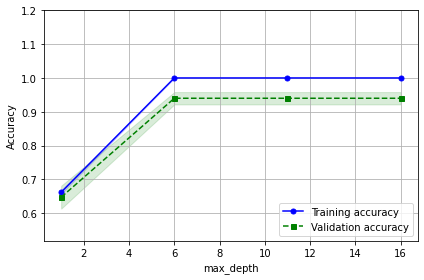

In [9]:
#housing
from sklearn.model_selection import validation_curve

param_range= [i for i in range(1,21,5)]
param_name='max_depth'

from sklearn.tree import DecisionTreeClassifier

dt_model_wine_m = DecisionTreeClassifier(random_state=42)
dt_model_wine_m.fit(wine_X_train, wine_y_train)

train_scores, test_scores = validation_curve(
                estimator=dt_model_wine_m, 
                X=wine_X_train, 
                y=wine_y_train, 
                param_name=param_name, 
                param_range=param_range,
                cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

viz_val_curve(param_range, train_mean, train_std, test_mean, test_std, param_name)

#### Evaluation
**Default performance**
* Train Accuracy(wine): 1.0
* Test Accuracy(wine): 0.9555555555555556

In [11]:
from sklearn.tree import DecisionTreeClassifier

proper_model_wine_m = DecisionTreeClassifier(max_depth=6, random_state=42)
proper_model_wine_m.fit(wine_X_train, wine_y_train)

from sklearn import metrics

predict = proper_model_wine_m.predict(wine_X_train)
acc = metrics.accuracy_score(wine_y_train, predict)
print('Train Accuracy(max_depth): {}'.format(acc))


predict = proper_model_wine_m.predict(wine_X_test)
acc = metrics.accuracy_score(wine_y_test, predict)
print('Test Accuracy(max_depth): {}'.format(acc))

Train Accuracy(max_depth): 1.0
Test Accuracy(max_depth): 0.9555555555555556


#### Validation_curve(min_samples_leaf)

#### **min_samples_leaf**
* int or float, default=1
  * If float, then min_samples_leaf is a fraction and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.
* The minimum number of samples required to be at a leaf node.

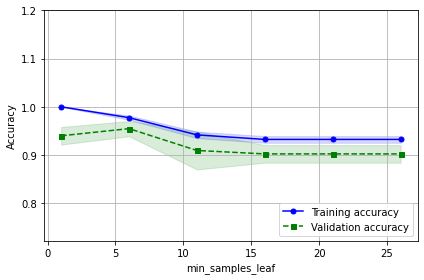

In [13]:
#housing
from sklearn.model_selection import validation_curve

param_range= [i for i in range(1,31,5)]
param_name='min_samples_leaf'

from sklearn.tree import DecisionTreeClassifier

dt_model_wine_msl = DecisionTreeClassifier(max_depth=6, random_state=42)
dt_model_wine_msl.fit(wine_X_train, wine_y_train)

train_scores, test_scores = validation_curve(
                estimator=dt_model_wine_msl, 
                X=wine_X_train, 
                y=wine_y_train, 
                param_name=param_name, 
                param_range=param_range,
                cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

viz_val_curve(param_range, train_mean, train_std, test_mean, test_std, param_name)

#### Evaluation
**Previous Best performance**
* Train Accuracy(max_depth): 1.0
* Test Accuracy(max_depth): 0.9555555555555556

In [14]:
from sklearn.tree import DecisionTreeClassifier

proper_modelwine__msl = DecisionTreeClassifier(max_depth=6, min_samples_leaf=6, random_state=42)
proper_modelwine__msl.fit(wine_X_train, wine_y_train)

from sklearn import metrics

predict = proper_modelwine__msl.predict(wine_X_train)
acc = metrics.accuracy_score(wine_y_train, predict)
print('Train Accuracy(min_samples_leaf): {}'.format(acc))


predict = proper_modelwine__msl.predict(wine_X_test)
acc = metrics.accuracy_score(wine_y_test, predict)
print('Test Accuracy(min_samples_leaf): {}'.format(acc))

Train Accuracy(min_samples_leaf): 0.9774436090225563
Test Accuracy(min_samples_leaf): 0.9333333333333333


#### Validation_curve(criterion)

#### **criterion**
* default = 'gini'
* ['gini', 'entropy']
* The function to measure the quality of a split.

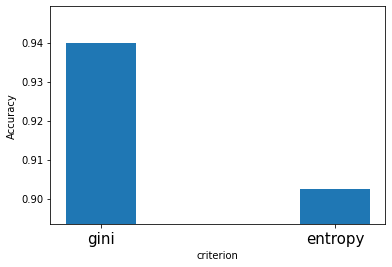

In [15]:
from sklearn.model_selection import validation_curve

param_range = ['gini', 'entropy']
param_name='criterion'

from sklearn.tree import DecisionTreeClassifier

dt_model_wine_c = DecisionTreeClassifier(max_depth=6, random_state=42)
dt_model_wine_c.fit(wine_X_train, wine_y_train)

train_scores, test_scores = validation_curve(
                estimator=dt_model_wine_c, 
                X=wine_X_train, 
                y=wine_y_train, 
                param_name=param_name, 
                param_range=param_range,
                cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

viz_val_bar(param_range, train_mean, train_std, test_mean, test_std, param_name)

#### Evaluation
**Previous Best performance**
* Train Accuracy(max_depth): 1.0
* Test Accuracy(max_depth): 0.9555555555555556

In [17]:
from sklearn.tree import DecisionTreeClassifier

proper_model_wine_c = DecisionTreeClassifier(max_depth=6, criterion='gini', random_state=42)
proper_model_wine_c.fit(wine_X_train, wine_y_train)

from sklearn import metrics

predict = proper_model_wine_c.predict(wine_X_train)
acc = metrics.accuracy_score(wine_y_train, predict)
print('Train Accuracy(criterion): {}'.format(acc))


predict = proper_model_wine_c.predict(wine_X_test)
acc = metrics.accuracy_score(wine_y_test, predict)
print('Test Accuracy(criterion): {}'.format(acc))

Train Accuracy(criterion): 1.0
Test Accuracy(criterion): 0.9555555555555556


#### Result
**Best performance**
* Train Accuracy(max_depth): 1.0
* Test Accuracy(max_depth): 0.9555555555555556



```python
DecisionTreeClassifier(max_depth=6, criterion='gini', random_state=42)
```



## 2번 문제
DecisionTreeClassifier을 사용하여 Breast cancer 데이터를 분류 하시오.

  * Validation_curve 함수를 사용하여 아래 Hyperparameters의 변화에 따른 결과를 그래프로 표현하시오.
    * max_depth
    * min_samples_leaf
    * criterion
  * 가장 높은 accuracy를 기록하는 파리미터 조합을 도출하시오.

  ```python
  from sklearn import datasets
  import pandas as pd

  breast = datasets.load_breast_cancer()
  breast_X = breast["data"]
  breast_y = breast["target"]
  breast_feature_name = breast.feature_names

  pd.DataFrame(breast_X, columns=breast_feature_name).head(5)
  ```

## 2번 문제 답안

### Setup

In [18]:
# common lib
import sklearn
import numpy as np

### Datasets



#### Breast cancer dataset
* The breast cancer dataset is a classic and very easy binary classification dataset.

In [33]:
from sklearn import datasets
import pandas as pd

breast = datasets.load_breast_cancer()
breast_X = breast["data"]
breast_y = breast["target"]
breast_feature_name = breast.feature_names

pd.DataFrame(breast_X, columns=breast_feature_name).head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Preprocess

#### Splitting

In [34]:
from sklearn.model_selection import train_test_split
breast_X_train, breast_X_test, breast_y_train, breast_y_test = train_test_split(breast_X, breast_y, random_state=42)

### DecisionTree Classifier



**- sklearn.tree.[DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) : Returns the instance itself.**

A decision tree classifier.

In [35]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(breast_X_train, breast_y_train)

DecisionTreeClassifier(random_state=42)

#### Evaluation

In [36]:
from sklearn import metrics

predict = dt_model.predict(breast_X_train)
acc = metrics.accuracy_score(breast_y_train, predict)
print('Train Accuracy(diabetes): {}'.format(acc))


predict = dt_model.predict(breast_X_test)
acc = metrics.accuracy_score(breast_y_test, predict)
print('Test Accuracy(diabetes): {}'.format(acc))

Train Accuracy(diabetes): 1.0
Test Accuracy(diabetes): 0.951048951048951


## Improving performance

### Preprocess

#### Splitting

In [28]:
from sklearn.model_selection import train_test_split
breast_X_train, breast_X_test, breast_y_train, breast_y_test = train_test_split(breast_X, breast_y, random_state=42)

### Set Hyperparameters(max_depth, min_samples_leaf,criterion)

#### Visualization 함수

In [29]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

def viz_val_curve(param_range, train_mean, train_std, test_mean, test_std, param_name, xscale_log=False):
  plt.plot(param_range, train_mean, 
          color='blue', marker='o', 
          markersize=5, label='Training accuracy')

  plt.fill_between(param_range, train_mean + train_std,
                  train_mean - train_std, alpha=0.15,
                  color='blue')

  plt.plot(param_range, test_mean, 
          color='green', linestyle='--', 
          marker='s', markersize=5, 
          label='Validation accuracy')

  plt.fill_between(param_range, 
                  test_mean + test_std,
                  test_mean - test_std, 
                  alpha=0.15, color='green')


  plt.grid()
  plt.legend(loc='lower right')
  if xscale_log:
    plt.xscale('log')
  plt.xlabel(param_name)
  plt.ylabel('Accuracy')
  plt.ylim([np.min(test_mean)*0.8, np.max(train_mean)*1.2])
  plt.tight_layout()
  plt.show()

In [30]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

def viz_val_bar(param_range, train_mean, train_std, test_mean, test_std, param_name):
  idx = np.arange(len(param_range))
  plt.bar(idx, test_mean, width=0.3)
  plt.xlabel(param_name)
  plt.ylabel('Accuracy')
  plt.ylim([np.min(test_mean)*0.99, np.max(test_mean)*1.01])
  plt.xticks(idx, param_range, fontsize=15)
  plt.show()

#### Validation_curve(max_depth)

#### **max_depth**
* default = None
* The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

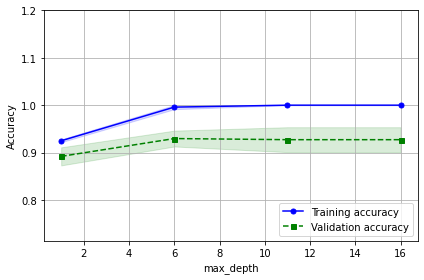

In [37]:
#housing
from sklearn.model_selection import validation_curve

param_range= [i for i in range(1,21,5)]
param_name='max_depth'

from sklearn.tree import DecisionTreeClassifier

dt_model_m = DecisionTreeClassifier(random_state=42)
dt_model_m.fit(breast_X_train, breast_y_train)

train_scores, test_scores = validation_curve(
                estimator=dt_model_m, 
                X=breast_X_train, 
                y=breast_y_train, 
                param_name=param_name, 
                param_range=param_range,
                cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

viz_val_curve(param_range, train_mean, train_std, test_mean, test_std, param_name)

#### Evaluation
**Default performance**
* Train Accuracy(diabetes): 1.0
* Test Accuracy(diabetes): 0.951048951048951

In [38]:
from sklearn.tree import DecisionTreeClassifier

proper_model_m = DecisionTreeClassifier(max_depth=6, random_state=42)
proper_model_m.fit(breast_X_train, breast_y_train)

from sklearn import metrics

predict = proper_model_m.predict(breast_X_train)
acc = metrics.accuracy_score(breast_y_train, predict)
print('Train Accuracy(max_depth): {}'.format(acc))


predict = proper_model_m.predict(breast_X_test)
acc = metrics.accuracy_score(breast_y_test, predict)
print('Test Accuracy(max_depth): {}'.format(acc))

Train Accuracy(max_depth): 0.9976525821596244
Test Accuracy(max_depth): 0.951048951048951


#### Validation_curve(min_samples_leaf)

#### **min_samples_leaf**
* int or float, default=1
  * If float, then min_samples_leaf is a fraction and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.
* The minimum number of samples required to be at a leaf node.

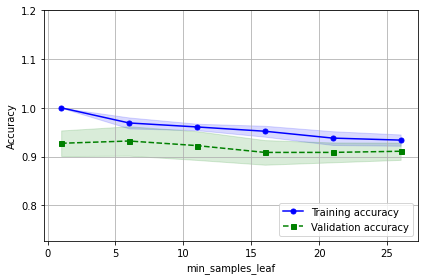

In [39]:
#housing
from sklearn.model_selection import validation_curve

param_range= [i for i in range(1,31,5)]
param_name='min_samples_leaf'

from sklearn.tree import DecisionTreeClassifier

dt_model_msl = DecisionTreeClassifier(max_depth=11, random_state=42)
dt_model_msl.fit(breast_X_train, breast_y_train)

train_scores, test_scores = validation_curve(
                estimator=dt_model_msl, 
                X=breast_X_train, 
                y=breast_y_train, 
                param_name=param_name, 
                param_range=param_range,
                cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

viz_val_curve(param_range, train_mean, train_std, test_mean, test_std, param_name)

#### Evaluation
**Previous Best performance**
* Train Accuracy(max_depth): 0.9976525821596244
* Test Accuracy(max_depth): 0.951048951048951


In [40]:
from sklearn.tree import DecisionTreeClassifier

proper_model_msl = DecisionTreeClassifier(max_depth=6, min_samples_leaf=6, random_state=42)
proper_model_msl.fit(breast_X_train, breast_y_train)

from sklearn import metrics

predict = proper_model_msl.predict(breast_X_train)
acc = metrics.accuracy_score(breast_y_train, predict)
print('Train Accuracy(min_samples_leaf): {}'.format(acc))


predict = proper_model_msl.predict(breast_X_test)
acc = metrics.accuracy_score(breast_y_test, predict)
print('Test Accuracy(min_samples_leaf): {}'.format(acc))

Train Accuracy(min_samples_leaf): 0.9788732394366197
Test Accuracy(min_samples_leaf): 0.958041958041958


#### Validation_curve(criterion)

#### **criterion**
* default = 'gini'
* ['gini', 'entropy']
* The function to measure the quality of a split.

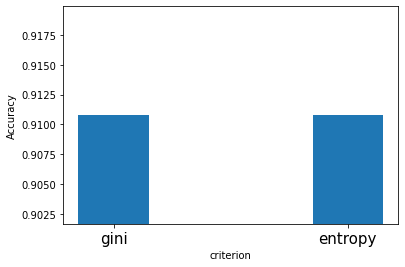

In [42]:
from sklearn.model_selection import validation_curve

param_range = ['gini', 'entropy']
param_name='criterion'

from sklearn.tree import DecisionTreeClassifier

dt_model_c = DecisionTreeClassifier(max_depth=11, min_samples_leaf=25, random_state=42)
dt_model_c.fit(breast_X_train, breast_y_train)

train_scores, test_scores = validation_curve(
                estimator=dt_model_c, 
                X=breast_X_train, 
                y=breast_y_train, 
                param_name=param_name, 
                param_range=param_range,
                cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

viz_val_bar(param_range, train_mean, train_std, test_mean, test_std, param_name)

#### Evaluation
**Previous Best performance**
* Train Accuracy(housing_min_samples_leaf): 0.7107881136950904
* Test Accuracy(housing_min_samples_leaf): 0.6544573643410853

In [43]:
from sklearn.tree import DecisionTreeClassifier

proper_model_c = DecisionTreeClassifier(max_depth=6, min_samples_leaf=6, criterion='entropy', random_state=42)
proper_model_c.fit(breast_X_train, breast_y_train)

from sklearn import metrics

predict = proper_model_c.predict(breast_X_train)
acc = metrics.accuracy_score(breast_y_train, predict)
print('Train Accuracy(min_criterion): {}'.format(acc))


predict = proper_model_c.predict(breast_X_test)
acc = metrics.accuracy_score(breast_y_test, predict)
print('Test Accuracy(min_criterion): {}'.format(acc))

Train Accuracy(min_criterion): 0.9765258215962441
Test Accuracy(min_criterion): 0.972027972027972


#### Result
**Best performance**
* Train Accuracy(min_criterion): 0.9765258215962441
* Test Accuracy(min_criterion): 0.972027972027972



```python
DecisionTreeClassifier(max_depth=6, min_samples_leaf=6, criterion='entropy', random_state=42)
```



## 3번 문제
DecisionTreeRegressor를 사용하여 Forest CoverType 데이터를 분류 하시오.

  * Validation_curve 함수를 사용하여 아래 Hyperparameters의 변화에 따른 결과를 그래프로 표현하시오.
    * max_depth, 
    * min_samples_leaf
    * ccp_alpha
  * 가장 높은 r2를 기록하는 파리미터 조합을 도출하시오.

  

#### Forest CoverType dataset
* Characteristic data of forest covertype
* Predict which type of covertype belongs to
* https://archive.ics.uci.edu/ml/datasets/Covertype 
* $Y$: discrete, 
  * $X_{0 ∼ 9}$: continuous
  * $X_{10 ∼ 53}$: discrete

  ```python
  #load data
  from sklearn.datasets import fetch_covtype
  import pandas as pd

  covtype = fetch_covtype()
  covtype_X = covtype.data[:,:10]
  covtype_y = covtype.target

  covtype_feature_name = covtype.feature_names[0:10]
  print('Number of targets: ',len(set(covtype_y)))

  pd.DataFrame(covtype_X, columns=covtype_feature_name).head(3)
  ```



## 3번 문제 답안

### Setup

In [44]:
# common lib
import sklearn
import numpy as np

### Datasets



#### Forest CoverType dataset
* Characteristic data of forest covertype
* Predict which type of covertype belongs to
* https://archive.ics.uci.edu/ml/datasets/Covertype 
* $Y$: discrete, 
  * $X_{0 ∼ 9}$: continuous
  * $X_{10 ∼ 53}$: discrete

In [56]:
from sklearn.datasets import fetch_covtype
import pandas as pd

covtype = fetch_covtype()
covtype_X = covtype.data[:,:10]
covtype_y = covtype.target

covtype_feature_name = covtype.feature_names[0:10]
print('Number of targets: ',len(set(covtype_y)))

pd.DataFrame(covtype_X, columns=covtype_feature_name)

Number of targets:  7


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0
...,...,...,...,...,...,...,...,...,...,...
581007,2396.0,153.0,20.0,85.0,17.0,108.0,240.0,237.0,118.0,837.0
581008,2391.0,152.0,19.0,67.0,12.0,95.0,240.0,237.0,119.0,845.0
581009,2386.0,159.0,17.0,60.0,7.0,90.0,236.0,241.0,130.0,854.0
581010,2384.0,170.0,15.0,60.0,5.0,90.0,230.0,245.0,143.0,864.0


### Preprocess

#### model based feature selection (1 feature)

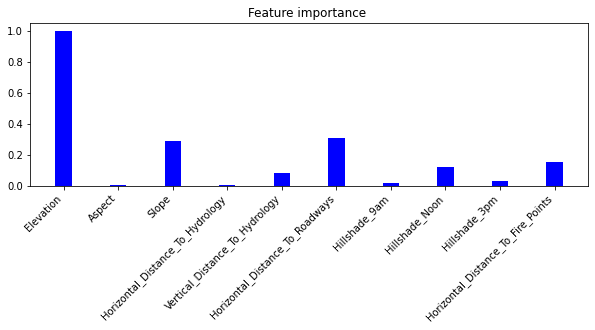

In [57]:
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

from sklearn.feature_selection import f_regression, SelectPercentile
from sklearn.preprocessing import scale

ft = {}
ft['score'] = f_regression(scale(covtype_X),covtype_y)[0]
ft['scaled_score'] = ft['score'] / np.max(ft['score'])

# Plot scores
x = np.arange(len(covtype_feature_name))
fig, ax1 = plt.subplots(1, 1, figsize=(10, 3))
w = 0.3

m1 = ax1.bar(x, ft['scaled_score'][x], width=w, color='b', align='center')

ax1.set_xticks(range(len(covtype_feature_name)))
ax1.set_xticklabels(covtype_feature_name, rotation=45, ha="right");
plt.title("Feature importance ")               
plt.show()

index = 0
covtype_X_ele = covtype["data"][:,index].reshape(-1,1)

#### Splitting

In [58]:
from sklearn.model_selection import train_test_split
covtype_X_train, covtype_X_test, covtype_y_train, covtype_y_test = train_test_split(covtype_X_ele, covtype_y, random_state=42)

#### Scaling

In [59]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
covtype_X_train_scale = scaler.fit_transform(covtype_X_train)
covtype_X_test_scale = scaler.transform(covtype_X_test)
pd.DataFrame(covtype_X_train_scale).head(3)

,0
0,0.487244
1,0.574787
2,0.545273


#### Visualization

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_regression_predictions(tree_reg, X, y, axes=[-10, 10, -10, 10], xlabel="$X$", ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel(xlabel, fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2)

def dt_reg_viz(X_train, y_train):
  from sklearn.tree import DecisionTreeRegressor

  tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=4)
  tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=6)

  tree_reg1.fit(X_train, y_train)
  tree_reg2.fit(X_train, y_train)

  fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
  axes_reg =[np.min(X_train)*1.1, np.max(X_train)*1.1, np.min(y_train)*1.1, np.max(y_train)*1.1]

  plt.sca(axes[0])
  plot_regression_predictions(tree_reg1, X_train, y_train, axes=axes_reg)

  plt.sca(axes[1])
  plot_regression_predictions(tree_reg2, X_train, y_train,axes=axes_reg)

  plt.show()

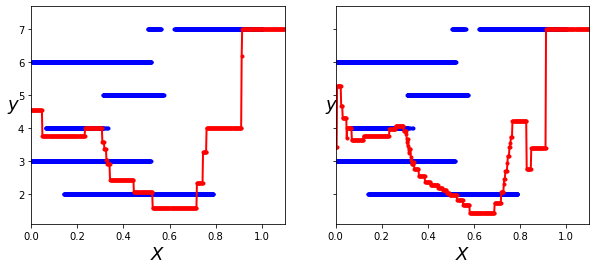

In [61]:
dt_reg_viz(covtype_X_train_scale, covtype_y_train)

### DecisionTree Regressor


**- sklearn.tree.[DecisionTreeRegressor(*, criterion='squared_error', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0)](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) : Returns the instance itself.**

A decision tree regressor.

In [64]:
from sklearn.tree import DecisionTreeRegressor

tree_reg_cov = DecisionTreeRegressor(random_state=42)
tree_reg_cov.fit(covtype_X_train_scale, covtype_y_train)

DecisionTreeRegressor(random_state=42)

#### Evaluation

In [76]:
from sklearn import metrics

predict = tree_reg_cov.predict(covtype_X_train_scale)
r2 = metrics.r2_score(covtype_y_train, predict)
print('Train r2(cov with a feature): {}'.format(r2))


predict = tree_reg_cov.predict(covtype_X_test_scale)
r2 = metrics.r2_score(covtype_y_test, predict)
print('Test r2(cov with a feature): {}'.format(r2))

Train r2(cov with a feature): 0.3008261557836157
Test r2(cov with a feature): 0.2806997926110554


## Improving performance

### Preprocess

#### model based feature selection (3 features)

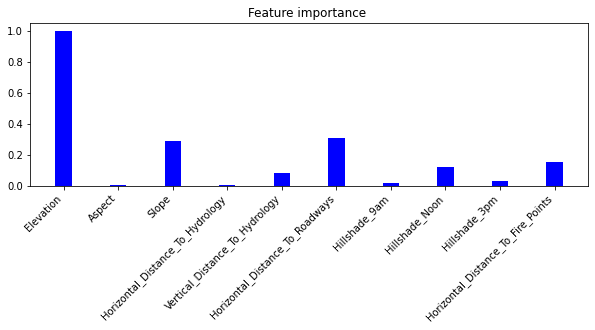

['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']
(581012, 3)


In [70]:
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

from sklearn.feature_selection import f_regression, SelectPercentile
from sklearn.preprocessing import scale

ft = {}
ft['score'] = f_regression(scale(covtype_X),covtype_y)[0]
ft['scaled_score'] = ft['score'] / np.max(ft['score'])

# Plot scores
x = np.arange(len(covtype_feature_name))
fig, ax1 = plt.subplots(1, 1, figsize=(10, 3))
w = 0.3

m1 = ax1.bar(x, ft['scaled_score'][x], width=w, color='b', align='center')

ax1.set_xticks(range(len(covtype_feature_name)))
ax1.set_xticklabels(covtype_feature_name, rotation=45, ha="right");
plt.title("Feature importance ")               
plt.show()

print(covtype_feature_name)
indices = [0, 2, 5]
covtype_X_three = covtype["data"][:, indices].reshape(-1,3)
print(covtype_X_three.shape)

#### Splitting

In [72]:
from sklearn.model_selection import train_test_split
covtype_X_train_three, covtype_X_test_three, covtype_y_train, covtype_y_test = train_test_split(covtype_X_three, covtype_y, random_state=42)

#### Scaling

In [73]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
covtype_X_train_scale_three = scaler.fit_transform(covtype_X_train_three)
covtype_X_test_scale_three = scaler.transform(covtype_X_test_three)
pd.DataFrame(covtype_X_train_scale).head(3)

,0
0,0.487244
1,0.574787
2,0.545273


### Make Decision Tree Regressor

In [74]:
from sklearn.tree import DecisionTreeRegressor

tree_reg_covtype_select = DecisionTreeRegressor(random_state=42)
tree_reg_covtype_select.fit(covtype_X_train_scale_three, covtype_y_train)

DecisionTreeRegressor(random_state=42)

#### Evaluation

**1 feature performance**

* Train r2(cov with a feature): 0.3008261557836157
* Test r2(cov with a feature): 0.2806997926110554

In [75]:
from sklearn import metrics

predict = tree_reg_covtype_select.predict(covtype_X_train_scale_three)
r2 = metrics.r2_score(covtype_y_train, predict)
print('Train r2(select 3 features): {}'.format(r2))


predict = tree_reg_covtype_select.predict(covtype_X_test_scale_three)
r2 = metrics.r2_score(covtype_y_test, predict)
print('Test r2(select 3 features): {}'.format(r2))

Train r2(select 3 features): 0.9978734223380368
Test r2(select 3 features): 0.012788957313189186


### Set Hyperparameters(max_depth, min_samples_leaf, ccp_alpha)

#### Visualization 함수

In [77]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

def viz_val_curve(param_range, train_mean, train_std, test_mean, test_std, param_name, xscale_log=False):
  plt.plot(param_range, train_mean, 
          color='blue', marker='o', 
          markersize=5, label='Training accuracy')

  plt.fill_between(param_range, train_mean + train_std,
                  train_mean - train_std, alpha=0.15,
                  color='blue')

  plt.plot(param_range, test_mean, 
          color='green', linestyle='--', 
          marker='s', markersize=5, 
          label='Validation accuracy')

  plt.fill_between(param_range, 
                  test_mean + test_std,
                  test_mean - test_std, 
                  alpha=0.15, color='green')


  plt.grid()
  plt.legend(loc='lower right')
  if xscale_log:
    plt.xscale('log')
  plt.xlabel(param_name)
  plt.ylabel('Accuracy')
  plt.ylim([np.min(test_mean)*0.8, np.max(train_mean)*1.2])
  plt.tight_layout()
  plt.show()

In [78]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

def viz_val_bar(param_range, train_mean, train_std, test_mean, test_std, param_name):
  idx = np.arange(len(param_range))
  plt.bar(idx, test_mean, width=0.3)
  plt.xlabel(param_name)
  plt.ylabel('Accuracy')
  plt.ylim([np.min(test_mean)*0.99, np.max(test_mean)*1.01])
  plt.xticks(idx, param_range, fontsize=15)
  plt.show()

#### Validation_curve(max_depth)

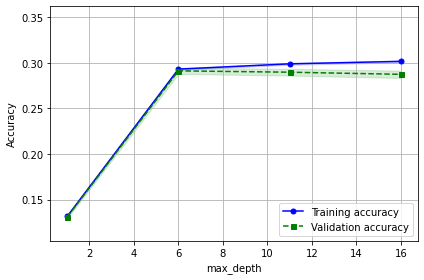

In [79]:
from sklearn.model_selection import validation_curve

param_range= [i for i in range(1,21,5)]
param_name='max_depth'

from sklearn.tree import DecisionTreeRegressor

tree_reg_covtype_m = DecisionTreeRegressor(random_state=42)
tree_reg_covtype_m.fit(covtype_X_train_scale, covtype_y_train)

train_scores, test_scores = validation_curve(
                estimator=tree_reg_covtype_m, 
                X=covtype_X_train_scale, 
                y=covtype_y_train, 
                param_name=param_name, 
                param_range=param_range,
                cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

viz_val_curve(param_range, train_mean, train_std, test_mean, test_std, param_name)

#### Evaluation
**Previous Best performance**
* Train r2(cov with a feature): 0.3008261557836157
* Test r2(cov with a feature): 0.2806997926110554

In [81]:
from sklearn.tree import DecisionTreeRegressor

proper_model_covtype_m = DecisionTreeRegressor(max_depth=6, random_state=42)
proper_model_covtype_m.fit(covtype_X_train_scale, covtype_y_train)

from sklearn import metrics

predict = proper_model_covtype_m.predict(covtype_X_train_scale)
r2 = metrics.r2_score(covtype_y_train, predict)
print('Train r2(max_depth): {}'.format(r2))


predict = proper_model_covtype_m.predict(covtype_X_test_scale)
r2 = metrics.r2_score(covtype_y_test, predict)
print('Test r2(max_depth): {}'.format(r2))

Train r2(max_depth): 0.29284265269214416
Test r2(max_depth): 0.28536811158317077


#### Validation_curve(min_samples_leaf)

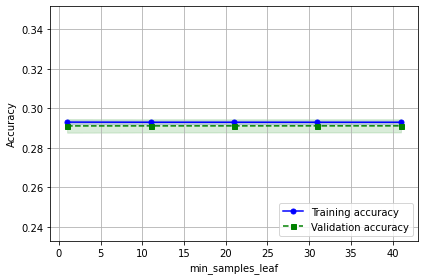

In [85]:
from sklearn.model_selection import validation_curve

param_range= [i for i in range(1,51,10)]
param_name='min_samples_leaf'

from sklearn.tree import DecisionTreeRegressor

tree_reg_covtype_msl = DecisionTreeRegressor(max_depth=6, random_state=42)
tree_reg_covtype_msl.fit(covtype_X_train_scale, covtype_y_train)

train_scores, test_scores = validation_curve(
                estimator=tree_reg_covtype_msl, 
                X=covtype_X_train_scale, 
                y=covtype_y_train, 
                param_name=param_name, 
                param_range=param_range,
                cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

viz_val_curve(param_range, train_mean, train_std, test_mean, test_std, param_name)

#### Evaluation
**Previous Best performance**
* Train r2(max_depth): 0.29284265269214416
* Test r2(max_depth): 0.28536811158317077

In [89]:
from sklearn.tree import DecisionTreeRegressor

proper_model_covtype_msl = DecisionTreeRegressor(max_depth=6, min_samples_leaf=20, random_state=42)
proper_model_covtype_msl.fit(covtype_X_train_scale, covtype_y_train)

from sklearn import metrics

predict = proper_model_covtype_msl.predict(covtype_X_train_scale)
r2 = metrics.r2_score(covtype_y_train, predict)
print('Train r2(min_samples_leaf): {}'.format(r2))


predict = proper_model_covtype_msl.predict(covtype_X_test_scale)
r2 = metrics.r2_score(covtype_y_test, predict)
print('Test r2(min_samples_leaf): {}'.format(r2))

Train r2(min_samples_leaf): 0.29277651261249127
Test r2(min_samples_leaf): 0.28540658986827805


#### Validation_curve(ccp_alpha)

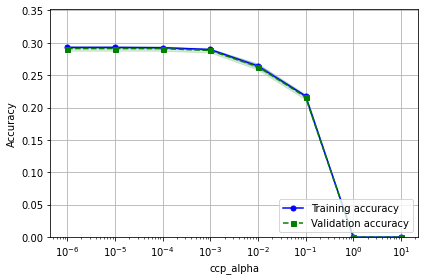

In [90]:
from sklearn.model_selection import validation_curve

param_range= [10**i for i in range(-6,2)]
param_name='ccp_alpha'

from sklearn.tree import DecisionTreeRegressor

tree_reg_covtype_ccp = DecisionTreeRegressor(max_depth=6, min_samples_leaf=20, random_state=42)
tree_reg_covtype_ccp.fit(covtype_X_train_scale, covtype_y_train)

train_scores, test_scores = validation_curve(
                estimator=tree_reg_covtype_ccp, 
                X=covtype_X_train_scale, 
                y=covtype_y_train, 
                param_name=param_name, 
                param_range=param_range,
                cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

viz_val_curve(param_range, train_mean, train_std, test_mean, test_std, param_name, xscale_log=True)

#### Evaluation
**Previous Best performance**
* Train r2(min_samples_leaf): 0.29277651261249127
* Test r2(min_samples_leaf): 0.28540658986827805

In [93]:
from sklearn.tree import DecisionTreeRegressor

proper_model_covtype_ccp = DecisionTreeRegressor(max_depth=6, min_samples_leaf=6, ccp_alpha=10**-4, random_state=42)
proper_model_covtype_ccp.fit(covtype_X_train_scale, covtype_y_train)

from sklearn import metrics

predict = proper_model_covtype_ccp.predict(covtype_X_train_scale)
r2 = metrics.r2_score(covtype_y_train, predict)
print('Train r2(ccp_alpha): {}'.format(r2))


predict = proper_model_covtype_ccp.predict(covtype_X_test_scale)
r2 = metrics.r2_score(covtype_y_test, predict)
print('Test r2(ccp_alpha): {}'.format(r2))

Train r2(ccp_alpha): 0.2922967575607037
Test r2(ccp_alpha): 0.2850862486715423


#### Result
**Best performance**
* Train r2(ccp_alpha): 0.2922967575607037
* Test r2(ccp_alpha): 0.2850862486715423



```python
DecisionTreeRegressor(max_depth=6, min_samples_leaf=6, ccp_alpha=10**-4, random_state=42)
```

